In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-risk-prediction-dataset-v2/stroke_risk_dataset_v2.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/kaggle/input/stroke-risk-prediction-dataset-v2/stroke_risk_dataset_v2.csv')
df.head()

,age,gender,chest_pain,high_blood_pressure,irregular_heartbeat,shortness_of_breath,fatigue_weakness,dizziness,swelling_edema,neck_jaw_pain,excessive_sweating,persistent_cough,nausea_vomiting,chest_discomfort,cold_hands_feet,snoring_sleep_apnea,anxiety_doom,stroke_risk_percentage,at_risk
0,22,Male,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,33.3,0
1,52,Male,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,100.0,1
2,63,Female,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,100.0,1
3,41,Male,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,44.5,0
4,53,Male,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,84.8,1


In [5]:
df.columns

Index(['age', 'gender', 'chest_pain', 'high_blood_pressure',
       'irregular_heartbeat', 'shortness_of_breath', 'fatigue_weakness',
       'dizziness', 'swelling_edema', 'neck_jaw_pain', 'excessive_sweating',
       'persistent_cough', 'nausea_vomiting', 'chest_discomfort',
       'cold_hands_feet', 'snoring_sleep_apnea', 'anxiety_doom',
       'stroke_risk_percentage', 'at_risk'],
      dtype='object')

In [6]:
# Check basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     35000 non-null  int64  
 1   gender                  35000 non-null  object 
 2   chest_pain              35000 non-null  int64  
 3   high_blood_pressure     35000 non-null  int64  
 4   irregular_heartbeat     35000 non-null  int64  
 5   shortness_of_breath     35000 non-null  int64  
 6   fatigue_weakness        35000 non-null  int64  
 7   dizziness               35000 non-null  int64  
 8   swelling_edema          35000 non-null  int64  
 9   neck_jaw_pain           35000 non-null  int64  
 10  excessive_sweating      35000 non-null  int64  
 11  persistent_cough        35000 non-null  int64  
 12  nausea_vomiting         35000 non-null  int64  
 13  chest_discomfort        35000 non-null  int64  
 14  cold_hands_feet         35000 non-null

In [7]:
# Check missing values
print(df.isnull().sum())

age                       0
gender                    0
chest_pain                0
high_blood_pressure       0
irregular_heartbeat       0
shortness_of_breath       0
fatigue_weakness          0
dizziness                 0
swelling_edema            0
neck_jaw_pain             0
excessive_sweating        0
persistent_cough          0
nausea_vomiting           0
chest_discomfort          0
cold_hands_feet           0
snoring_sleep_apnea       0
anxiety_doom              0
stroke_risk_percentage    0
at_risk                   0
dtype: int64


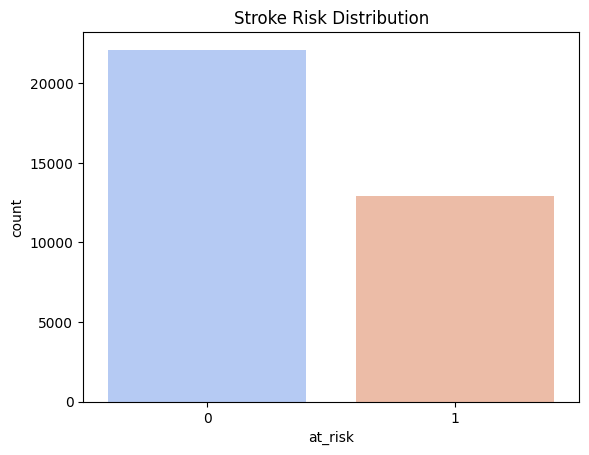

In [8]:
# Visualize target 'at_risk' (0 = No, 1 = Yes)
sns.countplot(x='at_risk', data=df, palette='coolwarm')
plt.title('Stroke Risk Distribution')
plt.show()

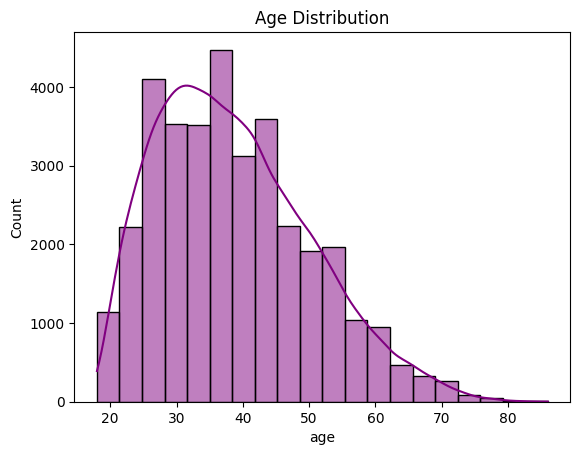

In [9]:
# Visualize age distribution
sns.histplot(df['age'], bins=20, kde=True, color='purple')
plt.title('Age Distribution')
plt.show()

In [10]:
# Convert categorical columns to numeric using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

In [11]:
# Define features and target
X = df.drop(['at_risk'], axis=1)
y = df['at_risk']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

best_model = None
best_score = 0

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    score = accuracy_score(y_test, model.predict(X_test))
    print(f"{name} Accuracy: {score:.4f}")
    
    if score > best_score:
        best_score = score
        best_model = model

print("\n✅ Best Model:", best_model.__class__.__name__, "with Accuracy:", round(best_score, 4))

Logistic Regression Accuracy: 0.9999
Random Forest Accuracy: 0.9999
Gradient Boosting Accuracy: 0.9999

✅ Best Model: LogisticRegression with Accuracy: 0.9999


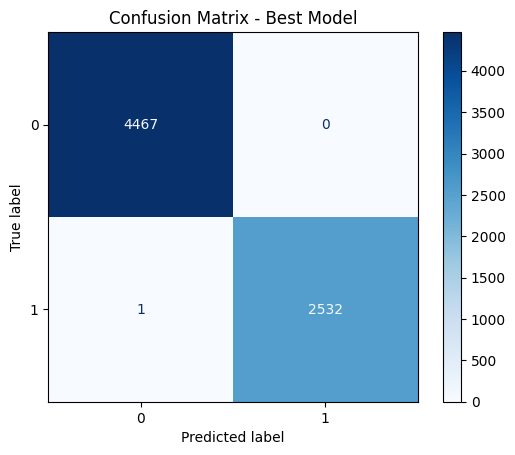

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict using the best model
y_pred = best_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Best Model")
plt.show()